<a href="https://colab.research.google.com/github/dlabate/AnalysisAstrocytes/blob/main/HW2_MATH6373_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem: Non-linear Regression

Torch solution

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ch = "https://github.com/jermwatt/machine_learning_refined/raw/main/exercises/ed_2/datasets/noisy_sin_samples.csv"
df = pd.read_csv(url)
df.head()

,0.68608,-0.99147
0,0.50679,-0.41632
1,0.34545,0.97764
2,0.75810,-0.61354
3,0.19030,1.27880
4,0.81336,-1.17450


1. Plot the dataset noisy sin sample.csv

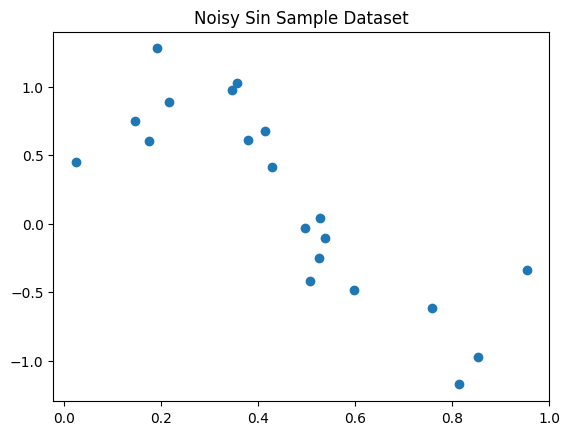

In [ ]:
x_sin = df.iloc[:, 0].to_numpy(dtype ='float64')
x_sin = np.reshape(x_sin, (20,1))

y_sin = df.iloc[:, 1].to_numpy(dtype ='float64')
y_sin = np.reshape(y_sin, (20,1))

plt.plot(x_sin, y_sin, 'o')
plt.title("Noisy Sin Sample Dataset")
plt.show()

2. Design three MLPs with 1 hidden layer and ReLU activation function for non-linear
regression using 50, 90 and 130 neurons in the hidden layer. For each architecture, train
a nonlinear regression model for varying numbers of epochs, and analyze the result
calculating the accuracy (MSE error)

In [ ]:
# hyperparameters:
input_size = 1
output_size = 1
learning_rate = 0.001

X_train = torch.tensor(x_sin, dtype=torch.float32)
y_train = torch.tensor(y_sin, dtype=torch.float32).view(-1, 1)
X_train.shape, y_train.shape

class NonLinearRegressionModel(nn.Module):
    def __init__(self, hidden_layer_neurons, num_epochs):
        super(NonLinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer_neurons)
        self.fc2 = nn.Linear(hidden_layer_neurons, output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [ ]:
def train_model(hidden_size, num_epochs):
    # Instantiate the nonlinear model, loss function, and optimizer
    nonlinear_model = NonLinearRegressionModel(hidden_size, num_epochs)
    nonlinear_criterion = nn.MSELoss()  # Mean Squared Error loss
    nonlinear_optimizer = optim.Adam(nonlinear_model.parameters(), lr=learning_rate)

    # Train the nonlinear model
    for epoch in range(num_epochs):
        nonlinear_optimizer.zero_grad()
        nonlinear_outputs = nonlinear_model(X_train)
        nonlinear_loss = nonlinear_criterion(nonlinear_outputs, y_train)
        nonlinear_loss.backward()
        nonlinear_optimizer.step()

        if (epoch+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nonlinear_loss.item():.4f}')

50 hidden layer neurons

In [ ]:
print("50 HIDDEN LAYER NEURONS, 100 EPOCHS OF TRAINING")
train_model(50, 100)
print("50 HIDDEN LAYER NEURONS, 500 EPOCHS OF TRAINING")
train_model(50, 500)
print("50 HIDDEN LAYER NEURONS, 1000 EPOCHS OF TRAINING")
train_model(50, 1000)
print("50 HIDDEN LAYER NEURONS, 1500 EPOCHS OF TRAINING")
train_model(50, 1500)

50 HIDDEN LAYER NEURONS, 100 EPOCHS OF TRAINING
Epoch [50/100], Loss: 0.4578
Epoch [100/100], Loss: 0.3361
50 HIDDEN LAYER NEURONS, 500 EPOCHS OF TRAINING
Epoch [50/500], Loss: 0.2810
Epoch [100/500], Loss: 0.1737
Epoch [150/500], Loss: 0.1372
Epoch [200/500], Loss: 0.1307
Epoch [250/500], Loss: 0.1281
Epoch [300/500], Loss: 0.1265
Epoch [350/500], Loss: 0.1250
Epoch [400/500], Loss: 0.1237
Epoch [450/500], Loss: 0.1224
Epoch [500/500], Loss: 0.1209
50 HIDDEN LAYER NEURONS, 1000 EPOCHS OF TRAINING
Epoch [50/1000], Loss: 0.3615
Epoch [100/1000], Loss: 0.2262
Epoch [150/1000], Loss: 0.1508
Epoch [200/1000], Loss: 0.1274
Epoch [250/1000], Loss: 0.1210
Epoch [300/1000], Loss: 0.1174
Epoch [350/1000], Loss: 0.1137
Epoch [400/1000], Loss: 0.1106
Epoch [450/1000], Loss: 0.1079
Epoch [500/1000], Loss: 0.1056
Epoch [550/1000], Loss: 0.1035
Epoch [600/1000], Loss: 0.1013
Epoch [650/1000], Loss: 0.0990
Epoch [700/1000], Loss: 0.0967
Epoch [750/1000], Loss: 0.0943
Epoch [800/1000], Loss: 0.0918
Ep

90 hidden layer neurons

In [ ]:
print("90 HIDDEN LAYER NEURONS, 100 EPOCHS OF TRAINING")
train_model(90, 100)
print("90 HIDDEN LAYER NEURONS, 500 EPOCHS OF TRAINING")
train_model(90, 500)
print("90 HIDDEN LAYER NEURONS, 1000 EPOCHS OF TRAINING")
train_model(90, 1000)
print("90 HIDDEN LAYER NEURONS, 1500 EPOCHS OF TRAINING")
train_model(90, 1500)

90 HIDDEN LAYER NEURONS, 100 EPOCHS OF TRAINING
Epoch [50/100], Loss: 0.3595
Epoch [100/100], Loss: 0.2079
90 HIDDEN LAYER NEURONS, 500 EPOCHS OF TRAINING
Epoch [50/500], Loss: 0.2776
Epoch [100/500], Loss: 0.1569
Epoch [150/500], Loss: 0.1345
Epoch [200/500], Loss: 0.1298
Epoch [250/500], Loss: 0.1260
Epoch [300/500], Loss: 0.1221
Epoch [350/500], Loss: 0.1185
Epoch [400/500], Loss: 0.1147
Epoch [450/500], Loss: 0.1112
Epoch [500/500], Loss: 0.1080
90 HIDDEN LAYER NEURONS, 1000 EPOCHS OF TRAINING
Epoch [50/1000], Loss: 0.2261
Epoch [100/1000], Loss: 0.1451
Epoch [150/1000], Loss: 0.1353
Epoch [200/1000], Loss: 0.1310
Epoch [250/1000], Loss: 0.1263
Epoch [300/1000], Loss: 0.1223
Epoch [350/1000], Loss: 0.1184
Epoch [400/1000], Loss: 0.1144
Epoch [450/1000], Loss: 0.1102
Epoch [500/1000], Loss: 0.1059
Epoch [550/1000], Loss: 0.1015
Epoch [600/1000], Loss: 0.0970
Epoch [650/1000], Loss: 0.0926
Epoch [700/1000], Loss: 0.0883
Epoch [750/1000], Loss: 0.0840
Epoch [800/1000], Loss: 0.0799
Ep

130 hidden layer neurons

In [ ]:
print("130 HIDDEN LAYER NEURONS, 100 EPOCHS OF TRAINING")
train_model(130, 100)
print("130 HIDDEN LAYER NEURONS, 500 EPOCHS OF TRAINING")
train_model(130, 500)
print("130 HIDDEN LAYER NEURONS, 1000 EPOCHS OF TRAINING")
train_model(130, 1000)
print("130 HIDDEN LAYER NEURONS, 1500 EPOCHS OF TRAINING")
train_model(130, 1500)

130 HIDDEN LAYER NEURONS, 100 EPOCHS OF TRAINING
Epoch [50/100], Loss: 0.2304
Epoch [100/100], Loss: 0.1385
130 HIDDEN LAYER NEURONS, 500 EPOCHS OF TRAINING
Epoch [50/500], Loss: 0.2551
Epoch [100/500], Loss: 0.1585
Epoch [150/500], Loss: 0.1363
Epoch [200/500], Loss: 0.1275
Epoch [250/500], Loss: 0.1217
Epoch [300/500], Loss: 0.1176
Epoch [350/500], Loss: 0.1137
Epoch [400/500], Loss: 0.1098
Epoch [450/500], Loss: 0.1059
Epoch [500/500], Loss: 0.1024
130 HIDDEN LAYER NEURONS, 1000 EPOCHS OF TRAINING
Epoch [50/1000], Loss: 0.2154
Epoch [100/1000], Loss: 0.1282
Epoch [150/1000], Loss: 0.1165
Epoch [200/1000], Loss: 0.1102
Epoch [250/1000], Loss: 0.1048
Epoch [300/1000], Loss: 0.0998
Epoch [350/1000], Loss: 0.0948
Epoch [400/1000], Loss: 0.0899
Epoch [450/1000], Loss: 0.0855
Epoch [500/1000], Loss: 0.0811
Epoch [550/1000], Loss: 0.0769
Epoch [600/1000], Loss: 0.0727
Epoch [650/1000], Loss: 0.0688
Epoch [700/1000], Loss: 0.0651
Epoch [750/1000], Loss: 0.0617
Epoch [800/1000], Loss: 0.0588

Comparing different numbers of hidden layer neurons while fixing the number of epochs (e.g., 500 epochs), we observe the following results: 50 neurons = Epoch [500/500], Loss: 0.1236; 90 neurons = Epoch [500/500], Loss: 0.0940; 130 neurons = Epoch [500/500], Loss: 0.0800. These results indicate that increasing the number of neurons in the hidden layer leads to better convergence of the model.

Based on the loss values, we can set the number of neurons to 130 and the number of epochs to 1100 (as after 1110 epochs of training, there is little improvement).

3. Repeat the analysis, keeping the best epoch number found above using this time the Tanh activation function. \\
**Plot the regression results** (superimposed to the original dataset as in the regression
example shown in class) for the two activation functions and provide observations on the
performance of each activation function, i.e., compare accuracy.

In [ ]:
class NonLinearRegressionModel_tanh(nn.Module):
    def __init__(self, hidden_layer_neurons, num_epochs):
        super(NonLinearRegressionModel_tanh, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer_neurons)
        self.fc2 = nn.Linear(hidden_layer_neurons, output_size)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x


In [ ]:
def train_model_relu(hidden_size, num_epochs):
    # Instantiate the nonlinear model, loss function, and optimizer
    nonlinear_model = NonLinearRegressionModel(hidden_size, num_epochs)
    nonlinear_criterion = nn.MSELoss()  # Mean Squared Error loss
    nonlinear_optimizer = optim.Adam(nonlinear_model.parameters(), lr=learning_rate)

    # Train the nonlinear model
    for epoch in range(num_epochs):
        nonlinear_optimizer.zero_grad()
        nonlinear_outputs = nonlinear_model(X_train)
        nonlinear_loss = nonlinear_criterion(nonlinear_outputs, y_train)
        nonlinear_loss.backward()
        nonlinear_optimizer.step()

        if (epoch+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nonlinear_loss.item():.4f}')


    nonlinear_model.eval()
    with torch.no_grad():
      x_plot = np.linspace(0, 1, 60)
      x_plot = np.reshape(x_plot, (60,1))
      x_plot_tensor = torch.tensor(x_plot, dtype=torch.float32)
      predictions = nonlinear_model(x_plot_tensor)
      # Plot the original dataset and regression results
      plt.scatter(x_sin, y_sin, label='Original Data')
      plt.plot(x_plot, predictions.numpy(), linestyle='solid', color='red', label='Regression Results')
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('Nonlinear Regression Results')
      plt.legend()
      plt.show()

Epoch [50/1100], Loss: 0.1947
Epoch [100/1100], Loss: 0.1350
Epoch [150/1100], Loss: 0.1276
Epoch [200/1100], Loss: 0.1210
Epoch [250/1100], Loss: 0.1146
Epoch [300/1100], Loss: 0.1082
Epoch [350/1100], Loss: 0.1019
Epoch [400/1100], Loss: 0.0958
Epoch [450/1100], Loss: 0.0899
Epoch [500/1100], Loss: 0.0843
Epoch [550/1100], Loss: 0.0790
Epoch [600/1100], Loss: 0.0741
Epoch [650/1100], Loss: 0.0696
Epoch [700/1100], Loss: 0.0654
Epoch [750/1100], Loss: 0.0616
Epoch [800/1100], Loss: 0.0581
Epoch [850/1100], Loss: 0.0549
Epoch [900/1100], Loss: 0.0522
Epoch [950/1100], Loss: 0.0498
Epoch [1000/1100], Loss: 0.0477
Epoch [1050/1100], Loss: 0.0437
Epoch [1100/1100], Loss: 0.0416


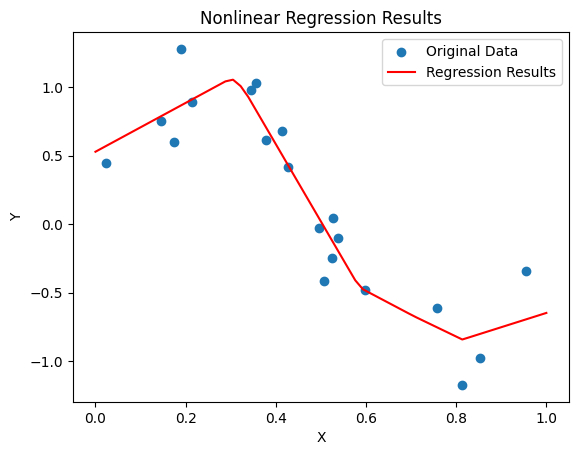

In [ ]:
train_model_relu(130, 1100)

In [ ]:
def train_model_tanh(hidden_size, num_epochs):
    # Instantiate the nonlinear model, loss function, and optimizer
    nonlinear_model = NonLinearRegressionModel_tanh(hidden_size, num_epochs)
    nonlinear_criterion = nn.MSELoss()  # Mean Squared Error loss
    nonlinear_optimizer = optim.Adam(nonlinear_model.parameters(), lr=learning_rate)

    # Train the nonlinear model
    for epoch in range(num_epochs):
        nonlinear_optimizer.zero_grad()
        nonlinear_outputs = nonlinear_model(X_train)
        nonlinear_loss = nonlinear_criterion(nonlinear_outputs, y_train)
        nonlinear_loss.backward()
        nonlinear_optimizer.step()

        if (epoch+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nonlinear_loss.item():.4f}')

    nonlinear_model.eval()
    with torch.no_grad():
      x_plot = np.linspace(0, 1, 100)
      x_plot = np.reshape(x_plot, (100,1))
      x_plot_tensor = torch.tensor(x_plot, dtype=torch.float32)
      predictions = nonlinear_model(x_plot_tensor)
      # Plot the original dataset and regression results
      plt.scatter(x_sin, y_sin, label='Original Data')
      plt.plot(x_plot, predictions.numpy(), linestyle='solid', color='red', label='Regression Results')
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('Nonlinear Regression Results')
      plt.legend()
      plt.show()


Epoch [50/1100], Loss: 0.1824
Epoch [100/1100], Loss: 0.1492
Epoch [150/1100], Loss: 0.1486
Epoch [200/1100], Loss: 0.1479
Epoch [250/1100], Loss: 0.1473
Epoch [300/1100], Loss: 0.1467
Epoch [350/1100], Loss: 0.1461
Epoch [400/1100], Loss: 0.1455
Epoch [450/1100], Loss: 0.1449
Epoch [500/1100], Loss: 0.1442
Epoch [550/1100], Loss: 0.1435
Epoch [600/1100], Loss: 0.1427
Epoch [650/1100], Loss: 0.1417
Epoch [700/1100], Loss: 0.1405
Epoch [750/1100], Loss: 0.1391
Epoch [800/1100], Loss: 0.1374
Epoch [850/1100], Loss: 0.1354
Epoch [900/1100], Loss: 0.1330
Epoch [950/1100], Loss: 0.1303
Epoch [1000/1100], Loss: 0.1273
Epoch [1050/1100], Loss: 0.1240
Epoch [1100/1100], Loss: 0.1203


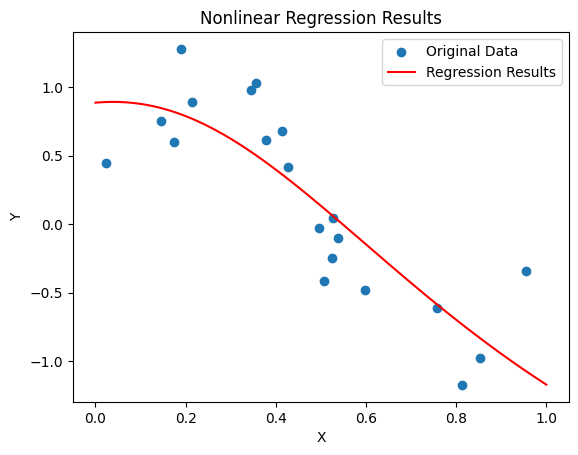

In [ ]:
train_model_tanh(130, 1100) #need to increase the number of epochs

Epoch [50/2000], Loss: 0.1677
Epoch [100/2000], Loss: 0.1479
Epoch [150/2000], Loss: 0.1474
Epoch [200/2000], Loss: 0.1468
Epoch [250/2000], Loss: 0.1463
Epoch [300/2000], Loss: 0.1458
Epoch [350/2000], Loss: 0.1452
Epoch [400/2000], Loss: 0.1446
Epoch [450/2000], Loss: 0.1440
Epoch [500/2000], Loss: 0.1433
Epoch [550/2000], Loss: 0.1426
Epoch [600/2000], Loss: 0.1417
Epoch [650/2000], Loss: 0.1406
Epoch [700/2000], Loss: 0.1393
Epoch [750/2000], Loss: 0.1376
Epoch [800/2000], Loss: 0.1357
Epoch [850/2000], Loss: 0.1335
Epoch [900/2000], Loss: 0.1309
Epoch [950/2000], Loss: 0.1281
Epoch [1000/2000], Loss: 0.1250
Epoch [1050/2000], Loss: 0.1215
Epoch [1100/2000], Loss: 0.1178
Epoch [1150/2000], Loss: 0.1136
Epoch [1200/2000], Loss: 0.1091
Epoch [1250/2000], Loss: 0.1041
Epoch [1300/2000], Loss: 0.0985
Epoch [1350/2000], Loss: 0.0925
Epoch [1400/2000], Loss: 0.0860
Epoch [1450/2000], Loss: 0.0794
Epoch [1500/2000], Loss: 0.0730
Epoch [1550/2000], Loss: 0.0669
Epoch [1600/2000], Loss: 0.0

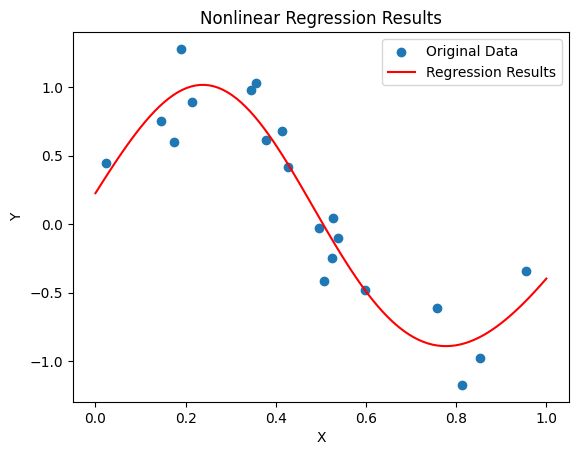

In [ ]:
train_model_tanh(130, 2000) #tanh need more epoch of training to obtain a good apporximation of the data

# Solution with sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


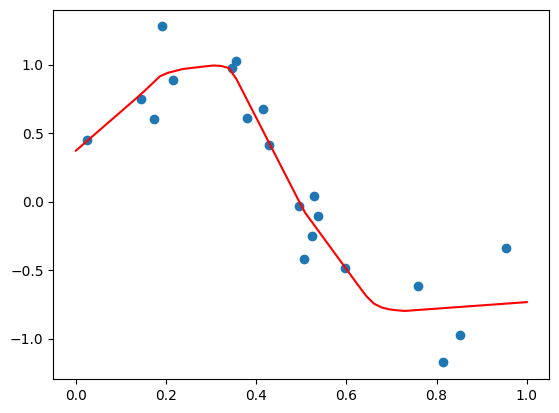

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


url = "https://github.com/jermwatt/machine_learning_refined/raw/main/exercises/ed_2/datasets/noisy_sin_samples.csv"
df = pd.read_csv(url)

x_sin = df.iloc[:, 0].to_numpy(dtype ='float64')
Xtrain = np.reshape(x_sin, (20,1))

y_sin = df.iloc[:, 1].to_numpy(dtype ='float64')
Ytrain = np.reshape(y_sin, (20,1))

Xtest = np.linspace(0, 1, 60)
Xtest = np.reshape(Xtest, (60,1))


#Relu solution by setting hidden_layer_size=130 and number of epoch=1100
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=(130,), max_iter=2000, tol=1e-8) # set verbose=True to visualize the training loss function values

mlp.fit(Xtrain, Ytrain)

Yguess = mlp.predict(Xtest)

plt.plot(Xtrain[:,0], Ytrain, 'o')
plt.plot(Xtest[:,0], Yguess, '-r')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


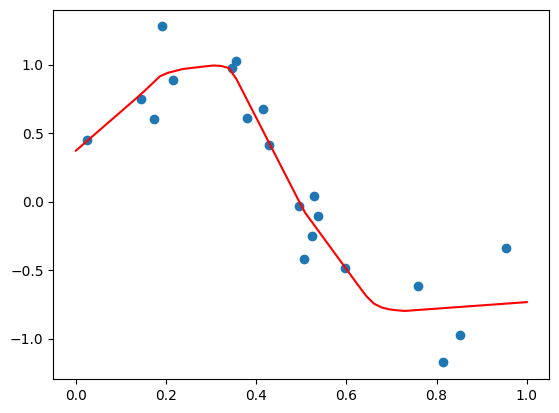

In [ ]:
#Tanh solution by setting hidden_layer_size=130 and number of epoch=1100
mlp_tanh = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(130,), max_iter=2000) # set verbose=True to visualize the training loss function values

mlp_tanh.fit(Xtrain, Ytrain)

Yguess_tanh = mlp.predict(Xtest)

plt.plot(Xtrain[:,0], Ytrain, 'o')
plt.plot(Xtest[:,0], Yguess_tanh, '-r')
